In [13]:
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
from os import listdir
from os.path import isfile, join
import cv2

In [14]:
class0_folder = "data/right_hand_palm"
class1_folder = "data/right_hand_fist"
class0_paths = [join(class0_folder, f) for f in listdir(class0_folder) if isfile(join(class0_folder, f))]
class1_paths = [join(class1_folder, f) for f in listdir(class1_folder) if isfile(join(class1_folder, f))]

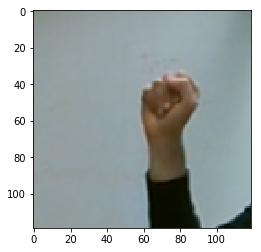

In [15]:
test_img = plt.imread(class1_paths[0])
plt.figure()
plt.imshow(test_img)

In [16]:
# Read all images.
class0_imgs = [cv2.cvtColor(cv2.resize(plt.imread(f), (100,100)), cv2.COLOR_BGR2GRAY) for f in class0_paths]
class1_imgs = [cv2.cvtColor(cv2.resize(plt.imread(f), (100,100)), cv2.COLOR_BGR2GRAY) for f in class1_paths]
all_imgs = class0_imgs + class1_imgs

# Shuffle the images along with their labels.
all_imgs_and_labels = list(zip(all_imgs, np.append(np.zeros(len(class0_imgs)).astype(np.uint8), np.ones(len(class1_imgs)).astype(np.uint8))))
random.shuffle(all_imgs_and_labels)

# Reshape the data in order to be fitted.
imgs, labels = zip(*all_imgs_and_labels)
n_samples = len(imgs)
data = np.array(imgs).reshape((n_samples, -1))
print(data.shape)

(715, 10000)


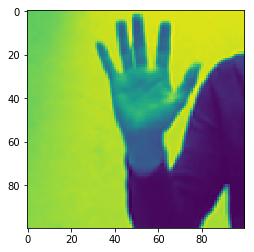

In [17]:
plt.figure()
plt.imshow(class0_imgs[0])

In [18]:
data

array([[0.74033105, 0.7470558 , 0.7470558 , ..., 0.        , 0.        ,
        0.        ],
       [0.03475986, 0.02927745, 0.02806788, ..., 0.5747138 , 0.5803571 ,
        0.5738298 ],
       [0.4813804 , 0.4743608 , 0.470302  , ..., 0.685646  , 0.7165866 ,
        0.71593726],
       ...,
       [0.4363133 , 0.43986672, 0.4473961 , ..., 0.6184628 , 0.61920714,
        0.6179217 ],
       [0.31990275, 0.32150784, 0.3226008 , ..., 0.6310051 , 0.63366693,
        0.6332955 ],
       [0.80446553, 0.8034911 , 0.8007729 , ..., 0.7771711 , 0.7679368 ,
        0.7432738 ]], dtype=float32)

In [19]:
# Split the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

In [20]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='rbf', gamma=0.001)

# Train the classifier on half of the data.
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# Now predict on the other half of the data.
expected = y_test
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.90      0.84      0.87        79

   micro avg       0.89      0.89      0.89       179
   macro avg       0.89      0.88      0.89       179
weighted avg       0.89      0.89      0.89       179


Confusion matrix:
[[93  7]
 [13 66]]


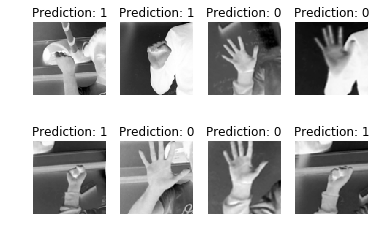

[1 1 0 0 1 0 0 1]
[1 1 0 0 1 0 0 1]


In [22]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[20:28]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((100, 100)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
print(np.array(expected[20:28]).astype(np.uint8))
print(np.array(predicted[20:28]).astype(np.uint8))

In [23]:
classifier = svm.SVC(kernel='rbf', gamma=0.001)
classifier.fit(data, labels)
dump(classifier, 'models/hand_classifier_nosegm_bw.joblib') 

['models/hand_classifier_nosegm_bw.joblib']